# LendingClub 

https://www.lendingclub.com/info/download-data.action

This website has data from 2019 Q1 back to 2007.  The most recent data is broken up into quaters. I have imported LoanStats_2019Q1(loan2019q1) the 2019 Q1 data.  I will use the 2018-2019 data for this analysis.
Here is the older data.

These data contain complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. 


1. Supervised Learning - to predict the good loans vs bad loans
2. Unsupervised Learning - see if there are any similar groups missed in the data
3. Time Series to forcast the number of rejected loans for a month


In [1]:
#![image.png](attachment:image.png)

1. predict if a loan will be defaulted
2. predict how many loans per month
3. what are the most important features of securing a loan
4. kmeans to cluster

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. They enable borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

This project will attempt to predict how many loans will be issued and of those loans how many will default.  First supervised learning will determine how well it can predict the number of loans issued.

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.  Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically.
Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Clustering analysis can be done on the basis of features where we try to find subgroups of samples based on features or on the basis of samples where we try to find subgroups of features based on samples. We’ll cover here clustering based on features. Clustering is used in market segmentation; where we try to fined customers that are similar to each other whether in terms of behaviors or attributes, image segmentation/compression; where we try to group similar regions together, document clustering based on topics, etc.

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups


Use time series to forecast the number of loans for the month.


The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

___Read in the data and clean out the unnecessary rows and combine the 
2018 and 2019 files into one dataframe.___

In [3]:
# ERROR when reading files, so I added the low_memory=False

# DtypeWarning: Columns () have mixed types.
# Specify dtype option on import or set
#low_memory=False. interactivity=interactivity,
# compiler=compiler, result=result)

loan2018q1 = pd.read_csv('LoanStats_2018Q1.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2018q2 = pd.read_csv('LoanStats_2018Q2.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2018q3 = pd.read_csv('LoanStats_2018Q3.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2018q4 = pd.read_csv('LoanStats_2018Q4.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2019q1 = pd.read_csv('LoanStats_2019Q1.csv',
                         low_memory=False, skiprows=[0])[:-2]

In [4]:
loans = [loan2018q1, loan2018q2, loan2018q3, loan2018q4, loan2019q1]
df = pd.concat(loans)

In [5]:
df.to_csv('lending_df')

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,25000.0,25000.0,25000.0,60 months,21.85%,688.35,D,D5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,11200.0,11200.0,11200.0,60 months,30.79%,367.82,G,G1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,60 months,12.61%,225.54,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6500.0,6500.0,6500.0,36 months,6.07%,197.95,A,A2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,10.41%,194.77,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


__LendingClub provides a dictionary of all the attributes__

In [7]:
# read in dict that explains all the features/attributes
df_attributes = pd.read_excel('LCDataDictionary.xlsx')
# setting column width to help read data dict
pd.options.display.max_colwidth = 255
# look at top of dict
print('records: ' + str(len(df_attributes)))

records: 153


In [8]:
df_attributes.isnull().any()
df_attributes.dropna(inplace=True)

In [9]:
df_attributes.head(3)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application


In [10]:
df_attributes[df_attributes['LoanStatNew'] == 'loan_status']
# df_attributes.iloc[42]

,LoanStatNew,Description
42,loan_status,Current status of the loan


In [11]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
115670,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.56%,169.83,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
115671,NaN,NaN,6000.0,6000.0,6000.0,36 months,6.46%,183.79,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
115672,NaN,NaN,16000.0,16000.0,16000.0,36 months,16.14%,563.62,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
115673,NaN,NaN,16000.0,16000.0,16000.0,60 months,11.31%,350.36,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
115674,NaN,NaN,29250.0,29250.0,29250.0,60 months,18.94%,757.80,D,D2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610917 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(107), object(37)
memory usage: 675.8+ MB


((610917, 144), None)

In [13]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,610917.000000,610917.000000,610917.000000,610917.000000,6.109170e+05,0.0,0.0,609528.000000,610917.000000,...,590.0,590.000000,590.0,590.000000,487.000000,590.000000,590.000000,866.000000,866.000000,866.000000
mean,NaN,16147.384178,16147.384178,16144.057272,469.351009,8.103302e+04,NaN,NaN,19.815929,0.228938,...,3.0,200.987254,3.0,13.581356,611.095626,15785.105085,220.900542,7098.285727,52.688048,18.124711
std,NaN,10182.091410,10182.091410,10182.443786,287.677225,9.323705e+04,NaN,NaN,20.464717,0.744291,...,0.0,145.553591,0.0,8.532132,430.427422,9108.061726,204.608260,4924.082691,8.823822,6.660081
min,NaN,1000.000000,1000.000000,725.000000,29.760000,0.000000e+00,NaN,NaN,0.000000,0.000000,...,3.0,5.950000,3.0,0.000000,31.470000,424.110000,0.070000,413.930000,29.920000,1.000000
25%,NaN,8300.000000,8300.000000,8300.000000,256.390000,4.655000e+04,NaN,NaN,11.570000,0.000000,...,3.0,90.240000,3.0,7.000000,277.935000,8202.280000,63.075000,3363.750000,45.000000,16.000000
50%,NaN,14000.000000,14000.000000,14000.000000,389.190000,6.700000e+04,NaN,NaN,17.860000,0.000000,...,3.0,170.260000,3.0,14.000000,523.170000,13891.090000,165.265000,5668.565000,50.000000,18.000000
75%,NaN,22000.000000,22000.000000,22000.000000,632.980000,9.700000e+04,NaN,NaN,25.180000,0.000000,...,3.0,272.995000,3.0,21.000000,824.880000,22414.395000,334.452500,9795.750000,60.000000,24.000000
max,NaN,40000.000000,40000.000000,40000.000000,1676.230000,9.930475e+06,NaN,NaN,999.000000,58.000000,...,3.0,876.460000,3.0,30.000000,2535.660000,40149.350000,1159.620000,28503.000000,80.000000,24.000000


___There are 610917 rows and 144 columns with data types of floats and objects.  Let's look to see what the unique values are in the dataframe.___

In [14]:
# all the unique values of each attribute
for var in df:
    print(var, '\n', df[var].unique(), '\n')

id 
 [nan] 

member_id 
 [nan] 

loan_amnt 
 [25000. 11200. 10000. ...  1425.  2025. 35125.] 

funded_amnt 
 [25000. 11200. 10000. ...  1425.  2025. 35125.] 

funded_amnt_inv 
 [25000.         11200.         10000.         ...  4938.25625391
  2025.         35125.        ] 

term 
 [' 60 months' ' 36 months'] 

int_rate 
 [' 21.85%' ' 30.79%' ' 12.61%' '  6.07%' ' 10.41%' '  7.34%' ' 17.47%'
 '  9.92%' ' 20.39%' ' 13.58%' ' 11.98%' '  7.96%' ' 18.45%' '  9.43%'
 '  6.71%' '  5.31%' ' 15.04%' ' 10.90%' ' 16.01%' ' 14.07%' ' 24.84%'
 ' 19.42%' ' 23.87%' ' 26.77%' ' 25.81%' ' 30.65%' ' 28.72%' ' 30.17%'
 ' 22.90%' ' 29.69%' ' 30.75%' ' 11.99%' ' 20.00%' ' 30.94%' '  6.00%'
 ' 15.05%' ' 17.09%' '  6.08%' '  7.35%' ' 10.91%' ' 12.62%' '  9.93%'
 ' 24.85%' ' 18.06%' ' 23.88%' ' 14.08%' ' 10.42%' '  9.44%' '  6.72%'
 ' 19.03%' ' 16.02%' ' 21.45%' ' 13.59%' '  5.32%' '  7.97%' ' 25.82%'
 ' 26.30%' ' 22.91%' ' 30.84%' ' 30.99%' ' 30.89%' ' 13.06%' ' 14.03%'
 ' 16.46%' '  8.08%' '  6.83%' ' 14.5

initial_list_status 
 ['w' 'f'] 

out_prncp 
 [21320.11  9866.69  8331.42 ...  4558.63  3486.63 28037.11] 

out_prncp_inv 
 [21320.11  9866.69  8331.42 ...  4558.63  3486.63 28037.11] 

total_pymnt 
 [ 9576.21  5111.16  2918.01 ...  1328.11   756.95 13091.39] 

total_pymnt_inv 
 [ 9576.21  5111.16  2918.01 ...  1328.11   756.95 13091.39] 

total_rec_prncp 
 [ 3679.89  1333.31  1668.58 ...   656.76   289.87 12513.37] 

total_rec_int 
 [5896.32 3777.85 1249.43 ...  442.85   11.05 1756.75] 

total_rec_late_fee 
 [ 0.         22.31       45.00000021 ... 50.72       38.24
 35.12      ] 

recoveries 
 [   0.   2519.02 1844.85 ... 1852.48 3444.48 5204.43] 

collection_recovery_fee 
 [  0.     453.4236 332.073  ... 333.4464 620.0064 936.7974] 

last_pymnt_d 
 ['May-2019' 'May-2018' 'Apr-2018' 'Dec-2018' 'Mar-2019' 'Apr-2019'
 'Jan-2019' 'Feb-2019' 'Oct-2018' 'Jun-2018' 'Sep-2018' 'Aug-2018'
 'Nov-2018' 'Jul-2018' nan 'Mar-2018' 'Feb-2018' 'Jan-2018' 'Jun-2019'] 

last_pymnt_amnt 
 [  688.35   

bc_util 
 [ 98.1  66.7  66.5 ... 122.5 126.5 149.7] 

chargeoff_within_12_mths 
 [0. 1. 3. 2. 7. 4. 9. 6. 5.] 

delinq_amnt 
 [0.0000e+00 2.3930e+03 6.9700e+02 4.0300e+02 3.2520e+03 1.9090e+03
 1.4430e+03 1.6000e+02 7.5300e+02 2.4000e+01 1.3520e+03 6.5400e+02
 9.9180e+03 9.9730e+03 2.3600e+02 4.3500e+02 6.4300e+03 9.8000e+01
 6.2750e+03 1.7560e+03 1.8270e+03 3.2850e+03 3.0430e+03 1.0486e+04
 3.5480e+03 1.5700e+02 2.3840e+03 9.1700e+02 1.4530e+03 1.1150e+03
 1.1500e+02 1.2870e+03 7.0000e+01 2.6000e+01 2.2140e+03 9.3490e+03
 9.3000e+02 5.2000e+01 1.2360e+03 5.5468e+04 1.7500e+03 2.8820e+03
 6.5000e+04 6.4000e+01 1.0300e+02 2.3820e+03 8.7090e+03 8.4000e+01
 5.0000e+00 4.6950e+03 1.9590e+03 2.4220e+03 1.3000e+02 6.3500e+03
 8.8080e+03 2.3040e+03 6.2000e+01 2.5970e+03 2.5110e+03 3.3356e+04
 1.6860e+03 1.8436e+04 3.3690e+03 2.1920e+03 9.4300e+02 1.5540e+03
 4.4200e+03 1.1564e+04 4.0900e+02 2.3300e+02 4.0311e+04 1.1250e+03
 1.8410e+03 1.5000e+01 3.2900e+02 2.5000e+01 2.2000e+02 6.3340e+03
 3.

percent_bc_gt_75 
 [100.    0.   40.   20.   50.   75.   16.7  33.3  12.5  66.7  60.    nan
  57.1  25.   11.1  22.2  83.3  85.7  77.8  14.3  23.1  41.7  37.5  71.4
  62.5  28.6  17.6  80.   38.5  90.   42.9  90.9  10.   45.5  43.8  30.
  72.7   9.1  21.4  78.6  61.5  18.2  88.9   5.9   7.1   8.3  54.5  55.6
  36.4  27.3  81.8  13.3  44.4   6.7  58.3   5.    6.3  53.8   5.6  87.5
   8.   30.8  63.6  46.2   7.7   3.8  15.4  70.    5.3  76.9  18.8  72.2
  91.7   9.5  69.2  35.3  92.3  31.3  68.8  35.7  29.4   8.7  47.1  12.
   4.8  23.5  53.3  73.3  86.7  84.6  26.3  46.7  61.1  41.2   3.6  26.7
  78.9  92.9   3.3   4.5   3.4   6.9  21.1  11.8  27.8   3.7  56.3  57.9
  84.2   2.1  64.3  52.9  35.   47.4  38.9  64.7   3.1  76.2  21.7   4.3
  22.6   4.2  13.   15.   81.3  10.5  58.8  38.1  15.8  36.8  22.7  70.6
  42.1  31.6  59.1  47.8  61.9  78.3  73.7  94.1   4.   82.4  85.   93.8
   2.6  19.   52.4  20.8  13.6  11.5  26.1  28.   91.3  48.   23.8   7.4
  41.4  55.   93.3  76.5  39.1  47

hardship_type 
 [nan 'INTEREST ONLY-3 MONTHS DEFERRAL'] 

hardship_reason 
 [nan 'DISABILITY' 'EXCESSIVE_OBLIGATIONS' 'UNEMPLOYMENT'
 'INCOME_CURTAILMENT' 'MEDICAL' 'REDUCED_HOURS' 'FAMILY_DEATH'
 'NATURAL_DISASTER' 'DIVORCE'] 

hardship_status 
 [nan 'COMPLETED' 'ACTIVE' 'BROKEN'] 

deferral_term 
 [nan  3.] 

hardship_amount 
 [   nan  63.88 572.83 189.69 176.09 204.99 395.37 200.66 251.73 119.29
 204.25 269.71 288.59  46.67 231.27 136.12 163.25 279.05  29.69  32.51
 288.86 252.5  261.97 361.62 126.27 305.86 113.89 532.51 122.88 148.89
 284.14  31.03  25.6  575.28 247.33 243.82  80.77 126.8  335.22  78.7
 129.01 126.53 162.06 341.85  10.49 284.05 216.82 255.77  74.89  96.37
  75.26  54.62  36.05  66.81 193.85  61.1  718.25  51.2   64.44 110.79
 108.12  39.55 325.51 323.32 335.18  86.24 217.78  57.85 562.69 317.13
 497.11 183.18 130.36 294.32 266.11  81.63 472.64  41.26 129.28 300.23
  60.94 248.87 458.2  170.47 432.66 140.81  84.91 111.55 255.35 247.22
 225.42 113.93  80.33 163.65 83

settlement_status 
 [nan 'ACTIVE' 'COMPLETE' 'BROKEN'] 

settlement_date 
 [nan 'Nov-2018' 'Feb-2019' 'Mar-2019' 'May-2019' 'Oct-2018' 'Apr-2019'
 'Jan-2019' 'Dec-2018' 'Sep-2018' 'Jul-2018' 'Aug-2018' 'Jun-2018'
 'Apr-2018'] 

settlement_amount 
 [     nan  8852.01  6554.3   4912.47  7818.34  5413.89  8121.     633.72
  2864.    6140.   14922.    1865.   13406.18  5659.    8522.79  2350.01
  1408.17 14391.   10798.   11619.97  6588.    9543.61 10187.02  7534.16
 13953.7   3751.   14285.    1657.   14699.55   870.97  1744.    9778.
  3686.    7098.    1827.   10500.   16073.    1421.    1877.66  6409.
  4182.   16769.42  9999.63  4820.54  1366.4   9081.6   4371.     920.
  2692.26 12001.81  2846.   12488.   15205.58  5811.    4319.   17000.
  7813.    8650.    9515.   11764.    4187.75  1898.    2883.    4897.
 11186.56  7450.    2728.26  4379.   10759.   12053.19  2553.    8268.66
  2455.    4065.    2772.    1636.59  2784.    2065.    4894.    4722.
  4380.57  2800.    1954.    7334.

## Data Cleaning

___For this part of the data cleaning, we are removing all features which are not relevant for the loan approval.
We want to remove all data that is collected after the loan is issued.___

___I will drop a few columns that are obviously not valuable to this model.___

In [15]:
df.drop(['id',
         'member_id',
         'url',
         'desc',
         'zip_code',
         'policy_code'
         ], inplace=True, axis=1)

___Now checking for missing values to see if any should be kept___

In [16]:
percentNull = 100 * df.isnull().sum() / len(df)
missingDF = pd.concat([df.isnull().sum(), percentNull], axis=1)

In [17]:
df.shape, missingDF.shape

((610917, 138), (138, 2))

In [18]:
missingDF = missingDF.rename(columns={
    0: 'Num_Missing',
    1: 'Percent_Missing'})
missingDF = missingDF[missingDF['Percent_Missing'] > 10]
missingDF.sort_values(by='Percent_Missing')

,Num_Missing,Percent_Missing
emp_title,74177,12.141911
mths_since_recent_inq,75662,12.384988
next_pymnt_d,79117,12.950532
il_util,98143,16.064866
mths_since_last_delinq,342451,56.055242
mths_since_recent_revol_delinq,435331,71.258616
mths_since_last_major_derog,471086,77.111293
mths_since_recent_bc_dlq,490209,80.241506
sec_app_chargeoff_within_12_mths,525251,85.977473
sec_app_num_rev_accts,525251,85.977473


___We have to double check the columns. We want to make sure we only
have data that is used to determine if a person gets
a loan or not.  We want to remove all data collected after
the loan is issued.___

In [19]:
for val in missingDF.index:
    print(val)
    df.drop([val], inplace=True, axis=1)

emp_title
mths_since_last_delinq
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
il_util
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
revol_bal_joint
sec_app_earliest_cr_line
sec_app_inq_last_6mths
sec_app_mort_acc
sec_app_open_acc
sec_app_revol_util
sec_app_open_act_il
sec_app_num_rev_accts
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med
sec_app_mths_since_last_major_derog
hardship_type
hardship_reason
hardship_status
deferral_term
hardship_amount
hardship_start_date
hardship_end_date
payment_plan_start_date
hardship_length
hardship_dpd
hardship_loan_status
orig_projected_additional_accrued_interest
hardship_payoff_balance_amount
hardship_last_payment_amount
debt_settlement_flag_date
settlement_status
settlement_date
settlement_amount
settlement_percentage
settlement_term


In [20]:
nullPercent2 = 100 * df.isnull().sum() / len(df)
missingDF2 = pd.concat([df.isnull().sum(), nullPercent2], axis=1)


missingDF2 = missingDF2.rename(columns={
    0: 'Num_Missing',
    1: 'Percent_Missing'})
missingDF2 = missingDF2[missingDF2['Percent_Missing'] > 1]
missingDF2

,Num_Missing,Percent_Missing
emp_length,53088,8.689887
mths_since_rcnt_il,21927,3.589195
bc_open_to_buy,7911,1.294939
bc_util,8181,1.339134
mo_sin_old_il_acct,21927,3.589195
mths_since_recent_bc,7456,1.220460
num_tl_120dpd_2m,15550,2.545354
percent_bc_gt_75,7925,1.297230


___I will remove the remaining rows of the null values___

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
                             ..
mo_sin_o

In [23]:
df.shape

(518348, 95)

___Now that all the null values are removed, I can remove the last of the columns that are not needed.  They are the features that occur after the loan has already been approved.  Again we are trying to predict the number of good loans.___

In [24]:
# all the unique values of each attribute
for var in df:
    print(var, '\n', df[var].unique(), '\n')

loan_amnt 
 [25000. 11200. 10000. ...  2125. 37650. 35125.] 

funded_amnt 
 [25000. 11200. 10000. ...  2125. 37650. 35125.] 

funded_amnt_inv 
 [25000. 11200. 10000. ...  2025. 37650. 35125.] 

term 
 [' 60 months' ' 36 months'] 

int_rate 
 [' 21.85%' ' 30.79%' ' 12.61%' '  6.07%' ' 10.41%' '  7.34%' '  9.92%'
 ' 20.39%' ' 13.58%' ' 11.98%' '  7.96%' ' 18.45%' '  9.43%' ' 17.47%'
 '  6.71%' '  5.31%' ' 15.04%' ' 10.90%' ' 16.01%' ' 14.07%' ' 24.84%'
 ' 19.42%' ' 23.87%' ' 26.77%' ' 25.81%' ' 30.65%' ' 28.72%' ' 30.17%'
 ' 22.90%' ' 30.75%' ' 29.69%' ' 11.99%' ' 20.00%' '  6.00%' ' 15.05%'
 '  6.08%' '  7.35%' ' 10.91%' ' 12.62%' ' 24.85%' ' 18.06%' ' 23.88%'
 ' 14.08%' '  9.44%' '  6.72%' ' 17.09%' '  9.93%' ' 10.42%' ' 19.03%'
 ' 16.02%' ' 21.45%' ' 13.59%' '  5.32%' ' 30.94%' '  7.97%' ' 25.82%'
 ' 26.30%' ' 22.91%' ' 30.84%' ' 13.06%' ' 16.46%' '  8.08%' '  6.83%'
 ' 11.05%' ' 14.03%' '  7.46%' ' 10.56%' '  6.19%' '  9.58%' ' 15.49%'
 ' 14.52%' ' 10.07%' ' 12.13%' ' 30.89%' '  6.67

revol_util 
 ['98.4%' '24.6%' '37.7%' ... '107.8%' '107.3%' '107.4%'] 

total_acc 
 [ 16.  14.  23.  12.  30.  53.  18.  24.   8.  25.  27.  39.  22.  33.
  15.  38.  26.  37.  21.  29.  13.  32.  36.   9.  17.  20.  10.  31.
  35.   3.  50.  44.  34.   6.  57.  47.  19.  28.  43.  42.  11.   4.
  45.   7.  51.  41.  64.  55.  62.  52.  49.   5.  40.  83.  74.  54.
  77.  65.  46.  56.  61.  59.  66.  63.  48.  60.  73.  85.  58.  70.
  76.  68.  86.  69.  82.  88.  72.  90.  75.  67.  87.  81.  95.  78.
  71. 106.  79. 116.  89.  84.  93. 153.  80.  97.  92.  98. 125. 115.
  91. 110.  96. 113. 133.  99. 117. 119. 138. 103.  94. 118. 100. 101.
 102. 111. 108. 140. 112. 105. 107. 123. 109. 120. 148. 114. 104. 128.
 160. 145. 164. 142.] 

initial_list_status 
 ['w' 'f'] 

out_prncp 
 [21320.11  9866.69  8331.42 ...  6210.13  4558.63  3486.63] 

out_prncp_inv 
 [21320.11  9866.69  8331.42 ...  6210.13  4558.63  3486.63] 

total_pymnt 
 [ 9576.21  5111.16  2918.01 ...   903.34   756.95 130

num_tl_90g_dpd_24m 
 [ 1.  0.  2.  7.  4. 11.  5.  6.  3. 10. 19.  9. 13. 12.  8. 14. 15. 17.
 23. 16. 21. 18. 58. 35. 20.] 

num_tl_op_past_12m 
 [ 0.  2.  6.  1.  5.  3.  7.  4.  8. 12.  9. 10. 11. 13. 16. 15. 14. 17.
 20. 19. 18. 22. 21. 23. 26. 24.] 

pct_tl_nvr_dlq 
 [ 75.   71.4  91.3  93.8 100.   96.7  98.   77.8  85.7  96.   95.7  96.3
  76.9  90.6  94.1  93.3  91.9  72.2  89.7  92.3  92.6  95.8  90.   95.2
  82.6  97.1  96.2  90.9  81.3  70.   95.5  93.1  97.3  47.8  88.9  96.5
  96.6  96.8  97.8  78.9  43.8  87.   94.3  92.9  57.9  88.2  97.2  83.3
  76.5  89.5  81.1  80.   97.4  82.8  66.7  84.   81.8  70.2  95.   87.5
  97.6  91.7  83.7  72.4  97.7  55.6  89.3  82.4  60.6  88.6  96.1  94.4
  79.2  91.4  93.5  42.9  89.2  90.5  46.7  78.6  86.7  70.6  97.9  93.2
  93.4  94.7  96.4  96.9  72.7  88.5  68.4  69.2  85.   92.1  88.   21.7
  92.   73.7  91.2  65.8  86.1  84.6  84.4  95.1  85.4  71.9  57.1  87.9
  94.6  87.1  70.8  93.   85.2  98.1  65.   76.2  73.3  90.3  63.2  62

In [25]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total

In [26]:
df.drop(['delinq_2yrs',
         'funded_amnt',
         'funded_amnt_inv',
         'int_rate',
         'delinq_2yrs',
         'earliest_cr_line',
         'total_pymnt',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_rec_int',
         'total_rec_late_fee',
         'recoveries',
         'collection_recovery_fee',
         'last_pymnt_d',
         'last_pymnt_amnt',
         'acc_now_delinq',
         'tot_coll_amt',
         'tot_cur_bal',
         'total_bal_il',
         'total_cu_tl',
         'inq_last_12m',
         'chargeoff_within_12_mths',
         'delinq_amnt',
         'hardship_flag',
         'debt_settlement_flag',
         'out_prncp_inv',
         'open_il_24m'
         ], inplace=True, axis=1)

___The features above are features that come after the loan has been approved, therefore they will be dropped.___

In [27]:
df.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'mths_since_rcnt_il', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0',

In [28]:
# all the unique values of each attribute
for var in df:
    print(var, '\n', df[var].unique(), '\n')

loan_amnt 
 [25000. 11200. 10000. ...  2125. 37650. 35125.] 

term 
 [' 60 months' ' 36 months'] 

installment 
 [ 688.35  367.82  225.54 ...  864.48  429.42 1215.33] 

grade 
 ['D' 'G' 'C' 'A' 'B' 'E' 'F'] 

sub_grade 
 ['D5' 'G1' 'C1' 'A2' 'B3' 'A4' 'B2' 'D4' 'C2' 'B5' 'A5' 'D2' 'B1' 'D1'
 'A3' 'A1' 'C4' 'B4' 'C5' 'C3' 'E3' 'D3' 'E2' 'E5' 'E4' 'F4' 'F1' 'F3'
 'E1' 'F5' 'F2' 'G4' 'G2' 'G3' 'G5'] 

emp_length 
 ['10+ years' '< 1 year' '4 years' '1 year' '9 years' '2 years' '8 years'
 '7 years' '5 years' '6 years' '3 years'] 

home_ownership 
 ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE'] 

annual_inc 
 [65000. 44000. 80000. ... 53529. 46572. 75005.] 

verification_status 
 ['Source Verified' 'Not Verified' 'Verified'] 

issue_d 
 ['Mar-2018' 'Feb-2018' 'Jan-2018' 'Jun-2018' 'May-2018' 'Apr-2018'
 'Sep-2018' 'Aug-2018' 'Jul-2018' 'Dec-2018' 'Nov-2018' 'Oct-2018'
 'Mar-2019' 'Feb-2019' 'Jan-2019'] 

loan_status 
 ['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'Late (16-30 days)' 'I

mo_sin_rcnt_tl 
 [ 16.   5.   4.  21.  10.   7.  11.  19.   2.   3.   1.  17.   6.  12.
  22.   0.  13.  33.   9.  30.  14.   8.  40.  20.  18.  31.  26.  15.
  69.  24.  23.  29.  43.  34.  32.  25.  28.  35.  39.  44.  50.  62.
  38.  57.  84.  45.  82. 103.  58.  42.  36.  27.  48.  97.  53. 107.
  55.  63.  64.  46.  37.  41. 141.  47.  49.  54.  91.  59.  52. 116.
  77.  76.  56.  79.  74.  67.  93.  72. 100.  98.  61.  60.  94.  51.
 113.  73.  68.  86. 140. 114.  66. 115. 121. 133.  65.  95.  80. 117.
  81. 125.  78.  85.  90. 146. 119.  88. 145.  83. 101.  75.  92.  89.
  70. 102.  96. 104. 124. 166.  71. 122. 128. 142. 137. 106. 118. 131.
  87. 172. 123. 138. 170. 110. 109. 127. 108.  99. 132. 129. 168. 111.
 130. 154. 135. 112. 120. 148. 139. 163. 158. 147. 126. 167. 150. 136.
 105. 144. 169. 160. 134. 149. 153. 175.] 

mort_acc 
 [ 2.  0.  4.  5.  1.  3.  6.  8. 14.  7.  9. 11. 10. 13. 12. 17. 31. 25.
 15. 16. 22. 23. 24. 18. 46. 21. 20. 19. 32. 87. 28.] 

mths_since_recent_

total_il_high_credit_limit 
 [ 10220.  74167.      0. ... 131291.   9187. 170529.] 



In [29]:
df.shape

(518348, 69)

In [30]:
df.to_csv('cleanedLendingClub.csv')

----------

___We have to deal with the features that have dates.  A loan can't be predicted from the same day.  So we have to subtract at least 30 days from the current date to underwrite the loan.___

In [31]:
# the issue data will be the date that is
# used to forcast with the time series
df.issue_d.value_counts()

Aug-2018    39509
Oct-2018    39497
May-2018    39331
Jan-2019    37211
Jul-2018    37117
Apr-2018    36670
Jun-2018    35939
Nov-2018    35391
Dec-2018    34068
Sep-2018    32843
Mar-2018    32528
Jan-2018    30705
Feb-2019    30240
Mar-2019    30192
Feb-2018    27107
Name: issue_d, dtype: int64

In [32]:
# I need to subtract one month from the date
df.last_credit_pull_d.value_counts()

May-2019    475762
Apr-2019     10375
Mar-2019      7642
Feb-2019      5434
Jan-2019      4727
Dec-2018      3041
Nov-2018      2665
Oct-2018      2210
Sep-2018      1563
Jul-2018      1344
Aug-2018      1297
May-2018       638
Apr-2018       438
Mar-2018       393
Jun-2018       279
Feb-2018       272
Jan-2018       231
Dec-2017        35
Nov-2017         1
Jun-2019         1
Name: last_credit_pull_d, dtype: int64

In [33]:
# convert the data for the feature 'issued_d'
df['issue_d_xx'] = pd.to_datetime(df['issue_d'])

maxDate = max(df.issue_d_xx)
df['issue_d_diff'] = (maxDate - df.issue_d_xx)
df['issue_d_diff'] = df['issue_d_diff'].dt.days
df['months_since_issue_d'] = df['issue_d_diff']/30.5
df = df.drop(['issue_d_xx', 'issue_d_diff'], axis=1)

In [34]:
# convert the date for the feature 'last_credit_pull_d'
df['last_credit_pull_d_xx'] = pd.to_datetime(df['last_credit_pull_d'])

maxDate = max(df.last_credit_pull_d_xx)
df['last_credit_pull_d_diff'] = (maxDate - df.last_credit_pull_d_xx)
df['last_credit_pull_d_diff'] = df['last_credit_pull_d_diff'].dt.days
df['months_since_last_credit_pull_d'] = df['last_credit_pull_d_diff']/30.5
df = df.drop(['last_credit_pull_d_xx', 'last_credit_pull_d_diff'], axis=1)

In [35]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518348 entries, 0 to 115673
Data columns (total 71 columns):
loan_amnt                          518348 non-null float64
term                               518348 non-null object
installment                        518348 non-null float64
grade                              518348 non-null object
sub_grade                          518348 non-null object
emp_length                         518348 non-null object
home_ownership                     518348 non-null object
annual_inc                         518348 non-null float64
verification_status                518348 non-null object
issue_d                            518348 non-null object
loan_status                        518348 non-null object
pymnt_plan                         518348 non-null object
purpose                            518348 non-null object
title                              518348 non-null object
addr_state                         518348 non-null object
dti             

((518348, 71), None)

---------

__Dropping all values that don't apply to loan approval for the loan status___

In [36]:
df.loan_status.value_counts()

Current               440961
Fully Paid             56725
Charged Off             9730
Late (31-120 days)      6857
In Grace Period         2370
Late (16-30 days)       1699
Default                    6
Name: loan_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

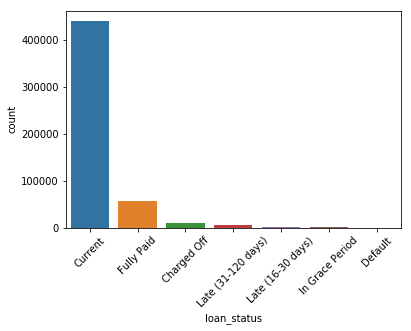

In [37]:
loan_stat = df["loan_status"]
sns.countplot(loan_stat)
stat_temp = df.loan_status.value_counts().sum()
plt.xticks(rotation=45);

In [38]:
df = df[df['loan_status'] != 'Current']
df = df[df['loan_status'] != 'In Grace Period']
df = df[df['loan_status'] != 'Late (16-30 days)']

In [39]:
df.loan_status.value_counts()

Fully Paid            56725
Charged Off            9730
Late (31-120 days)     6857
Default                   6
Name: loan_status, dtype: int64

In [40]:
df['good_loan_status'] = df['loan_status'] == 'Fully Paid'
df['bad_loan_status'] = df['loan_status'] != 'Fully Paid'

ls_map = {True: 1, False: 0}
df['good_loan_status'] = df['good_loan_status'].map(ls_map)
df['bad_loan_status'] = df['bad_loan_status'].map(ls_map)

In [41]:
df['good_loan_status'].value_counts().sum()

73318

In [42]:
df['bad_loan_status'].value_counts().sum()

73318

___The baseline accuracy score 77.37% for good loans versus bad loans.___

1    56725
0    16593
Name: good_loan_status, dtype: int64 
baseline: 0.7737 


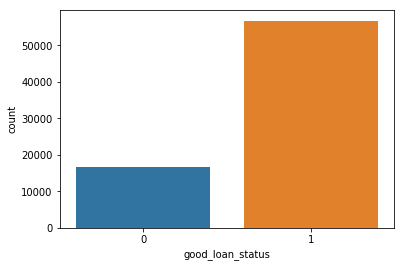

In [43]:
# baseline (56725/(56725+16593) - if predict all ones
good = df['good_loan_status']
sns.countplot(good)
good_temp = df['good_loan_status'].value_counts()
print(good_temp, '\nbaseline: {:.4f} '.format(56725/(56725+16593)))

In [44]:
df.head()

,loan_amnt,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,months_since_issue_d,months_since_last_credit_pull_d,good_loan_status,bad_loan_status
5,3000.0,36 months,93.10,A,A4,9 years,RENT,52000.0,Source Verified,Mar-2018,...,0.0,0.0,191216.0,141.0,30500.0,0.0,11.967213,6.950820,1,0
14,5000.0,36 months,166.03,B,B5,10+ years,OWN,55000.0,Not Verified,Mar-2018,...,1.0,0.0,61551.0,28880.0,22000.0,27751.0,11.967213,9.967213,1,0
23,20300.0,60 months,509.66,D,D1,< 1 year,RENT,55000.0,Verified,Mar-2018,...,0.0,0.0,87959.0,60594.0,24700.0,58404.0,11.967213,1.016393,0,1
28,7000.0,36 months,232.44,B,B5,< 1 year,MORTGAGE,40000.0,Verified,Mar-2018,...,0.0,0.0,132817.0,131726.0,10000.0,118917.0,11.967213,3.016393,1,0
34,10000.0,36 months,326.92,B,B4,< 1 year,RENT,52320.0,Source Verified,Mar-2018,...,1.0,0.0,72124.0,74220.0,2300.0,67724.0,11.967213,1.016393,1,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73318 entries, 5 to 115656
Data columns (total 73 columns):
loan_amnt                          73318 non-null float64
term                               73318 non-null object
installment                        73318 non-null float64
grade                              73318 non-null object
sub_grade                          73318 non-null object
emp_length                         73318 non-null object
home_ownership                     73318 non-null object
annual_inc                         73318 non-null float64
verification_status                73318 non-null object
issue_d                            73318 non-null object
loan_status                        73318 non-null object
pymnt_plan                         73318 non-null object
purpose                            73318 non-null object
title                              73318 non-null object
addr_state                         73318 non-null object
dti                             

In [46]:
# numerical and categorical variables
df_numerical = df.select_dtypes(include=['float64', 'int64'])
df_categorical = df.select_dtypes(include=['object'])

# Data Visulizations

In [47]:
import seaborn as sns
%matplotlib inline

In [48]:
for cats in df_categorical:
    print('\n\n' + cats+'\n****************')
    print(df[cats].value_counts())



term
****************
 36 months    52896
 60 months    20422
Name: term, dtype: int64


grade
****************
B    19559
C    19269
A    16689
D    12791
E     4035
F      810
G      165
Name: grade, dtype: int64


sub_grade
****************
B5    4317
B4    4185
C1    3978
A4    3972
C3    3929
B1    3881
C4    3862
B2    3861
C2    3793
C5    3707
A5    3545
A3    3397
B3    3315
A2    3035
D1    2774
D2    2762
A1    2740
D3    2589
D4    2373
D5    2293
E5    1108
E3     835
E4     753
E1     693
E2     646
F1     392
G1     140
F2     137
F3     114
F5      92
F4      75
G2      12
G3       5
G5       4
G4       4
Name: sub_grade, dtype: int64


emp_length
****************
10+ years    26442
2 years       7194
3 years       6639
< 1 year      6408
1 year        5243
4 years       5078
5 years       5000
6 years       3551
7 years       3010
8 years       2678
9 years       2075
Name: emp_length, dtype: int64


home_ownership
****************
MORTGAGE    37403
RENT        27082

In [49]:
for nums in df_numerical:
    print('\n\n' + nums+'\n****************')
    print(df[nums].value_counts())



loan_amnt
****************
10000.0    7206
20000.0    4766
15000.0    4081
12000.0    3358
5000.0     3145
30000.0    2936
25000.0    2794
40000.0    2793
6000.0     2515
35000.0    2506
8000.0     2421
16000.0    2215
24000.0    1489
4000.0     1405
18000.0    1344
3000.0     1280
7000.0     1274
14000.0     993
11000.0     809
9000.0      787
13000.0     764
2000.0      710
28000.0     628
32000.0     623
21000.0     597
1000.0      592
7500.0      567
17000.0     533
3500.0      476
6500.0      456
           ... 
30475.0       1
22275.0       1
5325.0        1
30450.0       1
17775.0       1
25975.0       1
18125.0       1
5475.0        1
16775.0       1
35650.0       1
1375.0        1
35675.0       1
13550.0       1
9425.0        1
35725.0       1
35775.0       1
22025.0       1
26175.0       1
30275.0       1
30150.0       1
36025.0       1
39800.0       1
36075.0       1
18050.0       1
35900.0       1
18075.0       1
36175.0       1
9075.0        1
36225.0       1
28675.0    

0.0         107
40474.0       8
26653.0       8
23244.0       7
26994.0       7
34027.0       6
18007.0       6
23836.0       6
34182.0       6
31904.0       6
11424.0       6
31136.0       6
22224.0       6
29870.0       6
28506.0       6
41254.0       6
21493.0       6
38009.0       6
1567.0        6
17042.0       6
32338.0       6
52304.0       6
33801.0       6
17677.0       6
22667.0       6
22027.0       5
24903.0       5
13581.0       5
18968.0       5
33339.0       5
           ... 
228302.0      1
23963.0       1
62075.0       1
14652.0       1
45070.0       1
147511.0      1
30086.0       1
122907.0      1
87085.0       1
147509.0      1
122911.0      1
9725.0        1
180287.0      1
96519.0       1
65540.0       1
69472.0       1
200493.0      1
61458.0       1
23567.0       1
11684.0       1
122996.0      1
39617.0       1
8978.0        1
61457.0       1
49035.0       1
106529.0      1
57458.0       1
29088.0       1
95850.0       1
896.0         1
Name: total_bal_ex_mort,

In [50]:
'''for var in df_numerical: 
    plt.scatter(y=df['loan_amnt'][df.loan_status=='Fully Paid'], 
                x=df[var][(df.loan_status=='Fully Paid')], c="black")
    plt.scatter(y=df['annual_inc'][df.loan_status=='Fully Paid'], 
                x=df[var][(df.loan_status=='Fully Paid')], c="green")
    plt.legend(["loan_amnt(black,annual_inc"])
    plt.ylabel(["loan_amnt,annual_inc"])
    plt.xlabel(var)
    plt.show()'''

'for var in df_numerical: \n    plt.scatter(y=df[\'loan_amnt\'][df.loan_status==\'Fully Paid\'], \n                x=df[var][(df.loan_status==\'Fully Paid\')], c="black")\n    plt.scatter(y=df[\'annual_inc\'][df.loan_status==\'Fully Paid\'], \n                x=df[var][(df.loan_status==\'Fully Paid\')], c="green")\n    plt.legend(["loan_amnt(black,annual_inc"])\n    plt.ylabel(["loan_amnt,annual_inc"])\n    plt.xlabel(var)\n    plt.show()'

In [51]:
df_numerical.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,loan_amnt,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,months_since_issue_d,months_since_last_credit_pull_d,good_loan_status,bad_loan_status
count,73318.000000,73318.000000,7.331800e+04,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,...,73318.000000,73318.000000,7.331800e+04,7.331800e+04,73318.000000,7.331800e+04,73318.000000,73318.000000,73318.000000,73318.000000
mean,15468.067869,461.477027,8.361535e+04,18.626475,0.544505,11.752080,0.156005,14699.303118,24.546087,1461.950196,...,0.139829,0.016012,2.003486e+05,5.426860e+04,26578.212881,4.902415e+04,9.351012,3.096293,0.773684,0.226316
std,10207.150444,295.089947,8.560834e+04,16.541851,0.784309,5.924854,0.447644,20951.016480,12.647825,5373.006080,...,0.352933,0.268795,1.930460e+05,5.353847e+04,25585.992106,4.829296e+04,3.505345,3.115489,0.418449,0.418449
min,1000.000000,30.120000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,2.000000e+02,0.000000e+00,100.000000,0.000000e+00,0.000000,1.016393,0.000000,0.000000
25%,7500.000000,239.357500,5.000000e+04,10.910000,0.000000,8.000000,0.000000,4476.000000,15.000000,0.000000,...,0.000000,0.000000,5.921875e+04,2.165525e+04,9900.000000,1.820325e+04,6.950820,1.016393,1.000000,0.000000
50%,12600.000000,379.280000,7.000000e+04,16.990000,0.000000,11.000000,0.000000,9589.000000,22.000000,0.000000,...,0.000000,0.000000,1.377690e+05,3.985100e+04,19000.000000,3.691300e+04,9.967213,2.000000,1.000000,0.000000
75%,21000.000000,635.125000,1.000000e+05,24.107500,1.000000,15.000000,0.000000,17920.500000,31.000000,0.000000,...,0.000000,0.000000,2.916788e+05,6.879850e+04,34800.000000,6.522750e+04,11.967213,3.934426,1.000000,0.000000
90%,30000.000000,899.484000,1.400000e+05,31.230000,2.000000,19.000000,1.000000,30674.600000,41.000000,0.000000,...,1.000000,0.000000,4.459759e+05,1.116285e+05,57100.000000,1.046160e+05,13.901639,7.967213,1.000000,1.000000
95%,35000.000000,1076.230000,1.750000e+05,35.950000,2.000000,23.000000,1.000000,43092.750000,48.000000,13108.271000,...,1.000000,0.000000,5.544916e+05,1.494419e+05,75700.000000,1.360551e+05,13.901639,9.967213,1.000000,1.000000
99%,40000.000000,1261.970000,3.000000e+05,55.024900,3.000000,31.000000,1.000000,91251.180000,64.000000,29223.653100,...,1.000000,0.000000,8.351071e+05,2.659343e+05,122983.000000,2.286251e+05,13.901639,14.983607,1.000000,1.000000


___There are more loans issued during the first 3 months than the rest of the year___

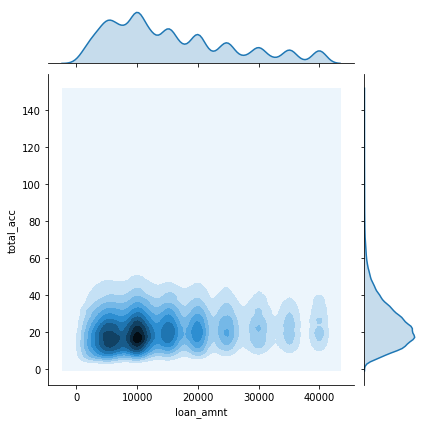

In [52]:
sns.jointplot(x=df["loan_amnt"], y=df["total_acc"], kind='kde')

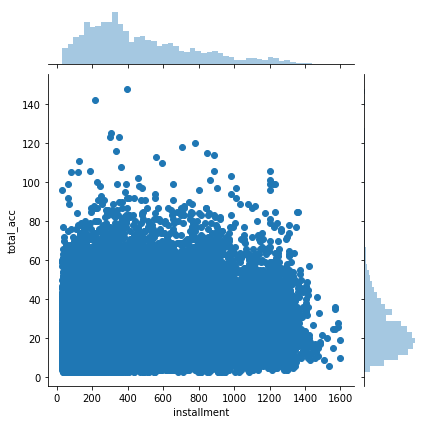

In [53]:
sns.jointplot(x=df["installment"], y=df["total_acc"], kind='scatter')

<Figure size 1008x648 with 0 Axes>

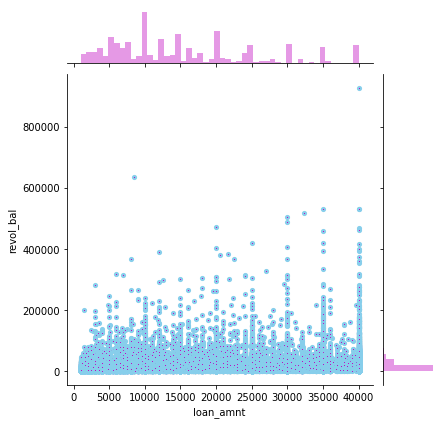

In [54]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=df["loan_amnt"], y=df["revol_bal"], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

___Loan amount and annual income comparison.  There are more 10k loans distributed than any other amount.___ 

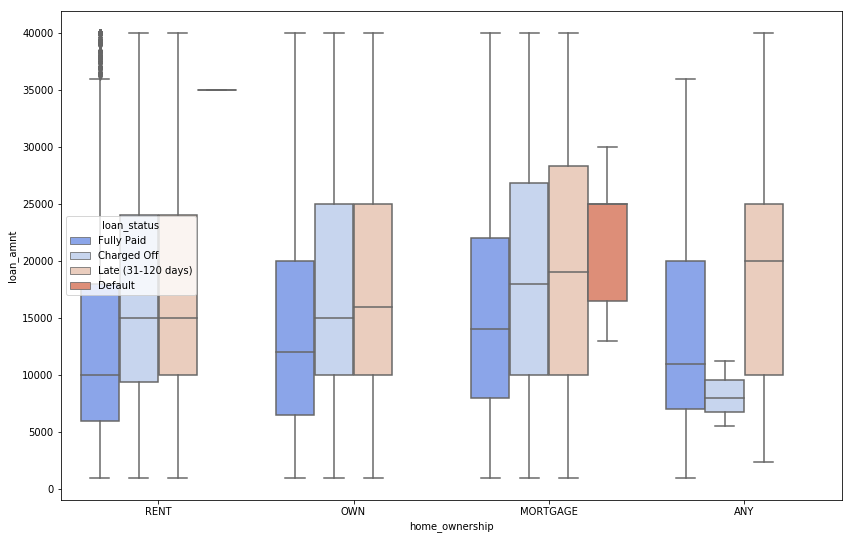

In [55]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="home_ownership", y="loan_amnt",
            hue="loan_status", data=df, palette="coolwarm")

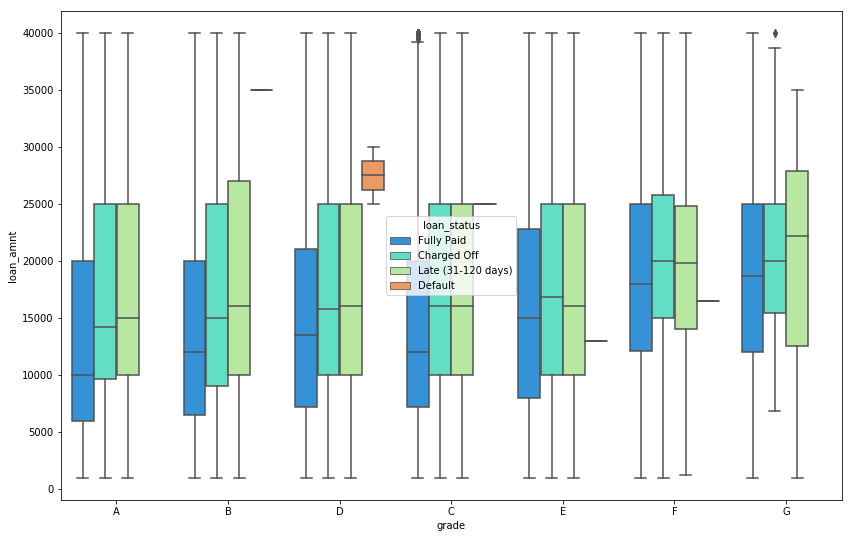

In [56]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="grade", y="loan_amnt", hue="loan_status",
            data=df, palette="rainbow")

___This is what to be expected, the larger the loan the longer the term to pay it back.___

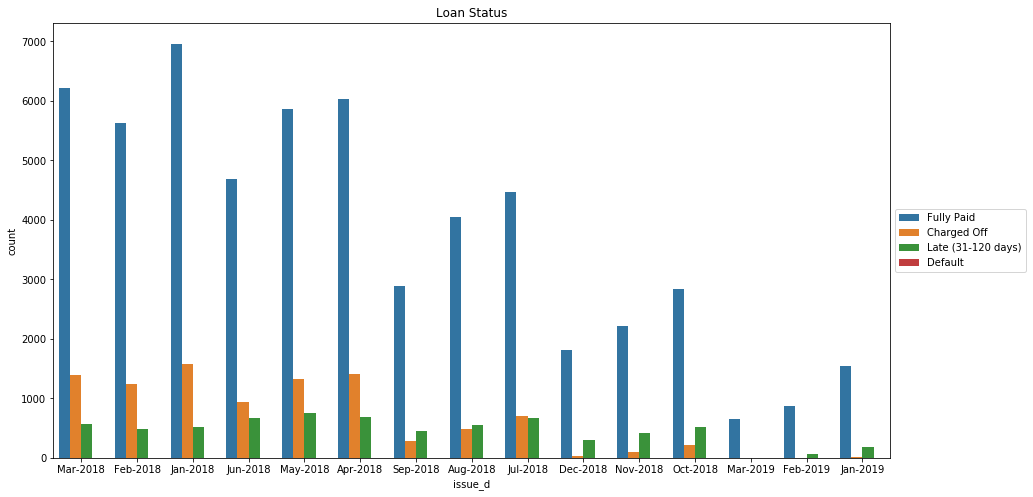

In [57]:
plt.figure(figsize=(15, 8))
sns.countplot(x='issue_d', hue='loan_status', data=df)
plt.title('Loan Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

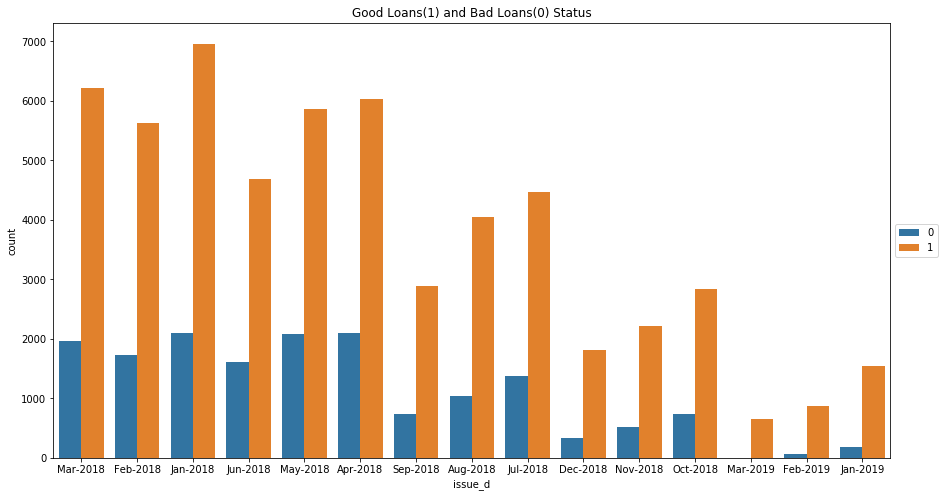

In [58]:
plt.figure(figsize=(15, 8))
sns.countplot(x='issue_d', hue='good_loan_status', data=df)
plt.title('Good Loans(1) and Bad Loans(0) Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


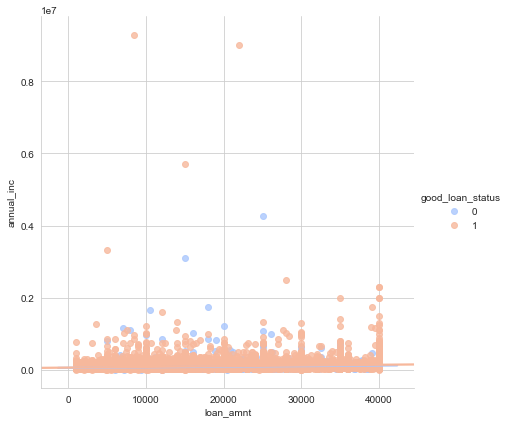

In [59]:
sns.set_style('whitegrid')
sns.lmplot('loan_amnt', 'annual_inc', data=df, hue='good_loan_status',
           palette='coolwarm', size=6, aspect=1, fit_reg=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


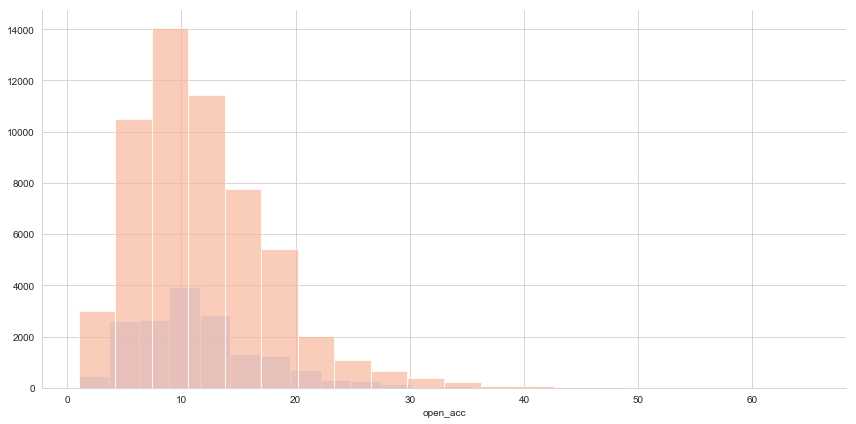

In [60]:
g = sns.FacetGrid(df, hue="good_loan_status",
                  palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'open_acc', bins=20, alpha=0.7)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
XX = add_constant(df_numerical.iloc[:, 1:])
pd.Series([variance_inflation_factor(XX.values, i) 
               for i in range(XX.shape[1])], 
              index=XX.columns)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                                 0.000000
installment                           1.247888
annual_inc                            1.290130
dti                                   1.213865
inq_last_6mths                        1.314168
open_acc                           1633.829471
pub_rec                            1050.325222
revol_bal                            13.909095
total_acc                           642.362260
out_prncp                             1.418189
collections_12_mths_ex_med            1.020890
open_acc_6m                           2.490994
open_act_il                          33.467068
open_il_12m                           9.324497
mths_since_rcnt_il                    1.503461
open_rv_12m                          21.692242
open_rv_24m                          10.415771
max_bal_bc                            4.636333
all_util                              2.666290
total_rev_hi_lim                     22.937968
inq_fi                                1.343967
acc_open_past

In [62]:
plt.figure(figsize=(40, 40))
corr = df.iloc[:, 1:].corr()
corr

,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,collections_12_mths_ex_med,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,months_since_issue_d,months_since_last_credit_pull_d,good_loan_status,bad_loan_status
installment,1.000000,0.212903,0.048797,-0.014585,0.119660,-0.019084,0.258649,0.107651,0.221854,-0.011313,...,-0.036122,0.015990,0.231630,0.193905,0.262195,0.144574,0.023464,0.028030,-0.137232,0.137232
annual_inc,0.212903,1.000000,-0.130428,0.016645,0.114721,-0.005266,0.273871,0.147871,0.020136,-0.007419,...,-0.024201,0.023042,0.365885,0.261403,0.237154,0.218680,-0.038717,0.005954,0.031132,-0.031132
dti,0.048797,-0.130428,1.000000,-0.010993,0.166242,-0.008935,0.113906,0.125874,0.019747,-0.012086,...,-0.003757,-0.009812,0.049166,0.202761,0.017713,0.232635,0.004936,-0.012593,-0.048729,0.048729
inq_last_6mths,-0.014585,0.016645,-0.010993,1.000000,0.154528,0.054425,-0.037588,0.149693,0.015927,0.000463,...,0.060298,0.011435,0.016979,0.029858,0.038660,0.042021,-0.015396,-0.042093,-0.055649,0.055649
open_acc,0.119660,0.114721,0.166242,0.154528,1.000000,0.017257,0.230278,0.712125,0.005118,0.001123,...,0.022312,-0.000402,0.292206,0.387554,0.406116,0.360537,-0.014161,-0.033632,0.020720,-0.020720
pub_rec,-0.019084,-0.005266,-0.008935,0.054425,0.017257,1.000000,-0.063010,0.004358,-0.004333,-0.005860,...,0.799142,0.614482,-0.045712,-0.035242,-0.103287,-0.013978,0.043312,-0.022788,-0.008986,0.008986
revol_bal,0.258649,0.273871,0.113906,-0.037588,0.230278,-0.063010,1.000000,0.205250,0.030636,-0.026884,...,-0.079973,0.000269,0.432899,0.486573,0.422212,0.155351,-0.013268,0.015238,0.008909,-0.008909
total_acc,0.107651,0.147871,0.125874,0.149693,0.712125,0.004358,0.205250,1.000000,-0.023186,-0.003724,...,0.015493,-0.013096,0.353799,0.450827,0.334669,0.439721,-0.031149,-0.016889,0.074518,-0.074518
out_prncp,0.221854,0.020136,0.019747,0.015927,0.005118,-0.004333,0.030636,-0.023186,1.000000,0.008540,...,-0.004894,-0.000624,-0.009864,0.014397,-0.004959,0.006837,-0.074344,-0.177148,-0.503087,0.503087
collections_12_mths_ex_med,-0.011313,-0.007419,-0.012086,0.000463,0.001123,-0.005860,-0.026884,-0.003724,0.008540,1.000000,...,-0.011646,0.005245,-0.017855,-0.017181,-0.033903,-0.007174,0.006838,-0.005218,-0.016956,0.016956


<Figure size 2880x2880 with 0 Axes>

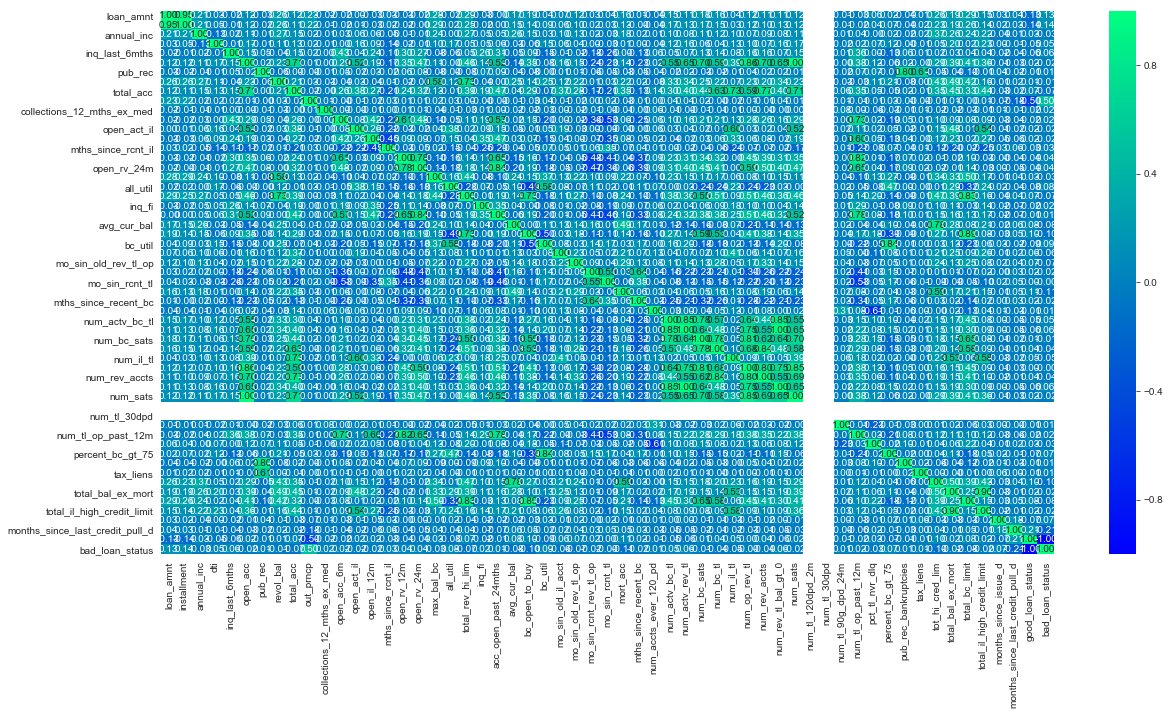

In [63]:
# Is there collinearity?
plt.figure(figsize=(20, 10))
sns.heatmap(data=df_numerical.corr(), cmap="winter", fmt=".2f", annot=True)

In [64]:
'''h = sns.pairplot(df_numerical, hue="good_loan_status")'''

'h = sns.pairplot(df_numerical, hue="good_loan_status")'

In [65]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(
        np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [66]:
trimm_correlated(df, 10)

,loan_amnt,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,months_since_issue_d,months_since_last_credit_pull_d,good_loan_status,bad_loan_status
5,3000.0,93.10,52000.0,0.58,0.0,7.0,0.0,141.0,30.0,0.00,...,0.0,0.0,191216.0,141.0,30500.0,0.0,11.967213,6.950820,1,0
14,5000.0,166.03,55000.0,14.18,0.0,14.0,1.0,11449.0,24.0,0.00,...,1.0,0.0,61551.0,28880.0,22000.0,27751.0,11.967213,9.967213,1,0
23,20300.0,509.66,55000.0,26.63,0.0,10.0,0.0,17506.0,26.0,0.00,...,0.0,0.0,87959.0,60594.0,24700.0,58404.0,11.967213,1.016393,0,1
28,7000.0,232.44,40000.0,20.25,0.0,13.0,0.0,5004.0,29.0,0.00,...,0.0,0.0,132817.0,131726.0,10000.0,118917.0,11.967213,3.016393,1,0
34,10000.0,326.92,52320.0,12.87,1.0,6.0,1.0,1692.0,26.0,0.00,...,1.0,0.0,72124.0,74220.0,2300.0,67724.0,11.967213,1.016393,1,0
39,28000.0,915.36,103000.0,30.76,0.0,12.0,0.0,21266.0,30.0,0.00,...,0.0,0.0,153679.0,76475.0,80300.0,73379.0,11.967213,1.016393,1,0
43,40000.0,838.71,150000.0,4.09,0.0,6.0,1.0,4373.0,9.0,0.00,...,1.0,0.0,74455.0,15615.0,44200.0,27755.0,11.967213,4.950820,1,0
44,30000.0,1143.39,57000.0,27.58,1.0,11.0,0.0,29222.0,26.0,0.00,...,0.0,0.0,188780.0,62252.0,29400.0,35000.0,11.967213,5.967213,1,0
45,21000.0,560.94,85000.0,15.76,0.0,15.0,0.0,14591.0,27.0,0.00,...,0.0,0.0,172433.0,51667.0,27100.0,39733.0,11.967213,1.016393,1,0
49,5000.0,150.56,36610.0,13.85,1.0,15.0,0.0,8623.0,20.0,0.00,...,0.0,0.0,105289.0,17742.0,88600.0,11389.0,11.967213,3.934426,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12969d780>,
      dtype=object)

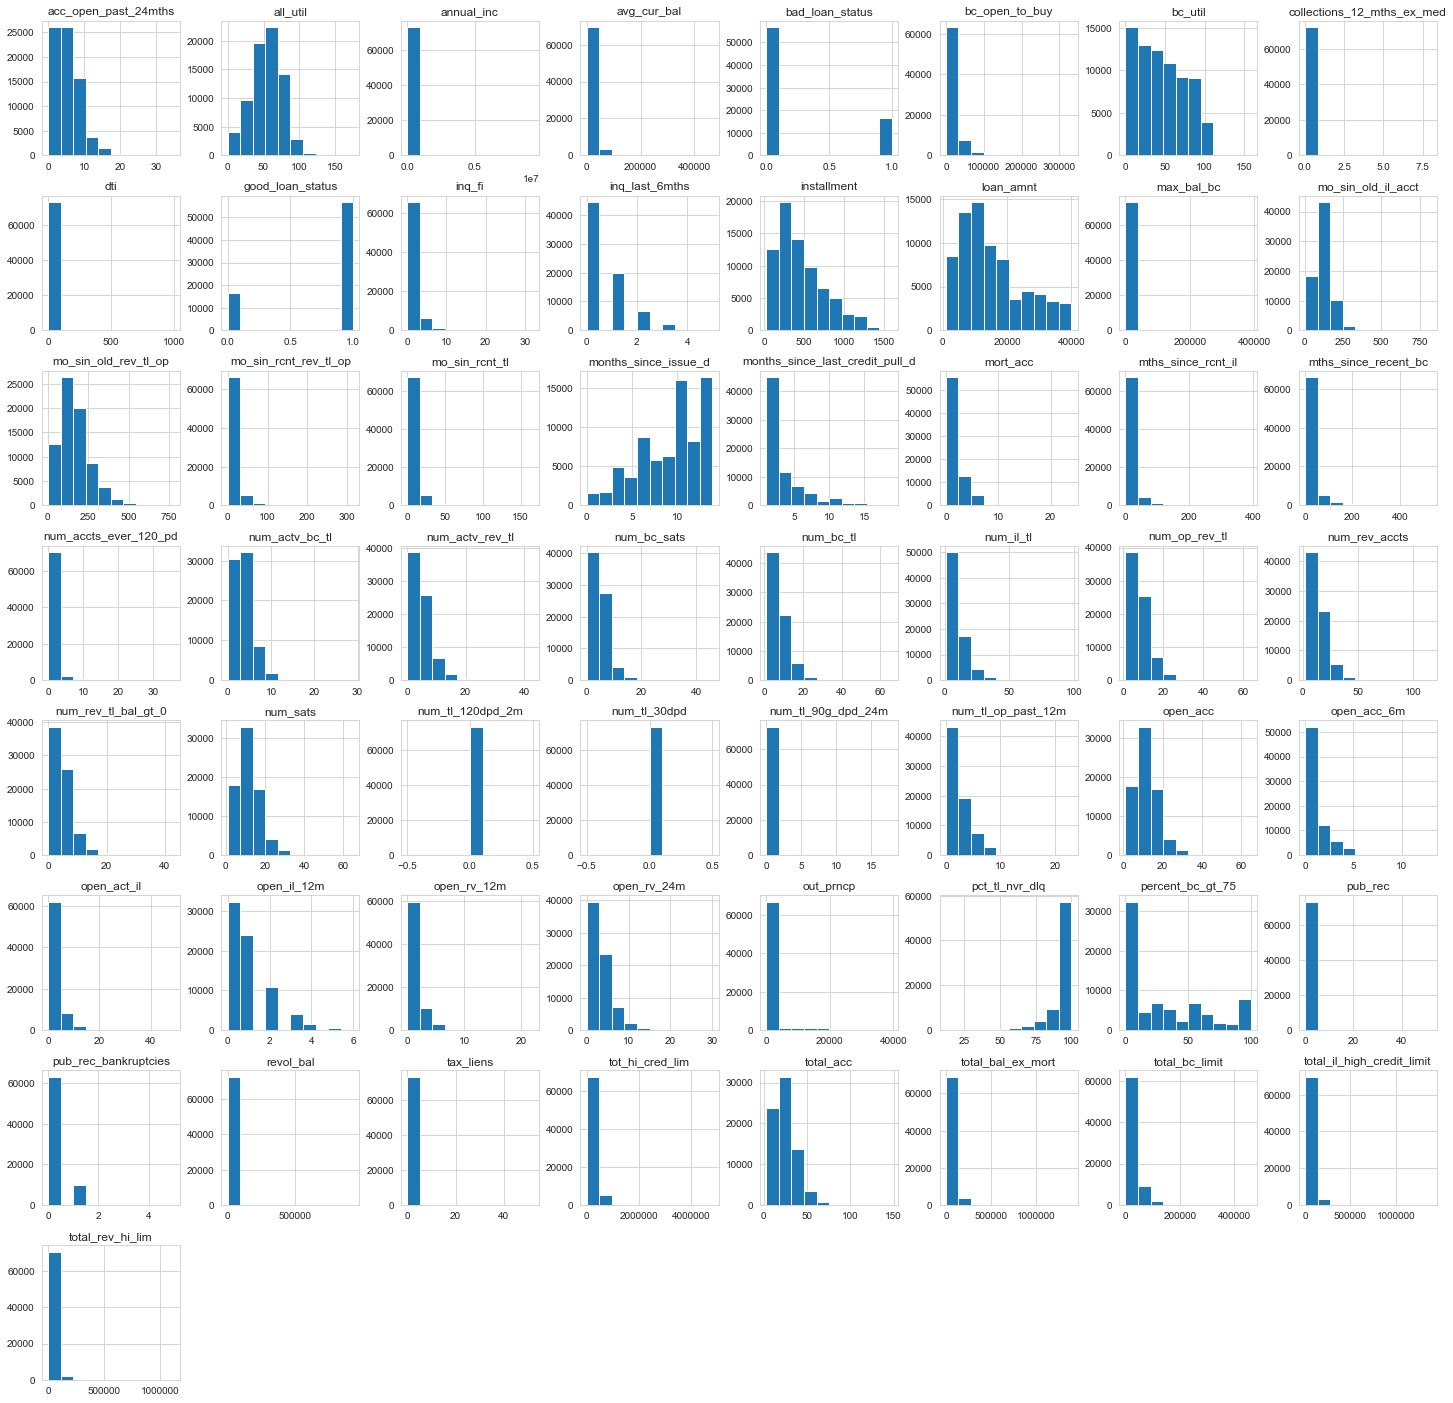

In [67]:
df[df.dtypes[(df.dtypes == "float64") | (df.dtypes == "int64")]
   .index.values].hist(figsize=[25, 25])

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
XX = add_constant(df_numerical.iloc[:, 1:])
pd.Series([variance_inflation_factor(XX.values, i)
           for i in range(XX.shape[1])],
          index=XX.columns)

const                                 0.000000
installment                           1.247888
annual_inc                            1.290130
dti                                   1.213865
inq_last_6mths                        1.314168
open_acc                           1633.829471
pub_rec                            1050.325222
revol_bal                            13.909095
total_acc                           642.362260
out_prncp                             1.418189
collections_12_mths_ex_med            1.020890
open_acc_6m                           2.490994
open_act_il                          33.467068
open_il_12m                           9.324497
mths_since_rcnt_il                    1.503461
open_rv_12m                          21.692242
open_rv_24m                          10.415771
max_bal_bc                            4.636333
all_util                              2.666290
total_rev_hi_lim                     22.937968
inq_fi                                1.343967
acc_open_past

-----

---------

In [69]:
from numpy import array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,revol_util,initial_list_status,last_credit_pull_d,application_type
5,0,0,3,9,3,1,9,2,0,5,7,46,5,1,16,0
14,0,1,9,1,2,0,9,2,0,8,10,10,334,1,2,0
23,1,3,15,10,3,2,9,0,0,1,2,33,744,1,14,0
28,0,1,9,10,1,2,9,2,0,3,6,42,355,1,12,0
34,0,1,8,10,3,1,9,2,0,2,3,46,380,1,14,0


In [70]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,loan_amnt,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,...,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,revol_util,initial_list_status,last_credit_pull_d,application_type
5,3000.0,93.10,52000.0,0.58,0.0,7.0,0.0,141.0,30.0,0.0,...,9,2,0,5,7,46,5,1,16,0
14,5000.0,166.03,55000.0,14.18,0.0,14.0,1.0,11449.0,24.0,0.0,...,9,2,0,8,10,10,334,1,2,0
23,20300.0,509.66,55000.0,26.63,0.0,10.0,0.0,17506.0,26.0,0.0,...,9,0,0,1,2,33,744,1,14,0
28,7000.0,232.44,40000.0,20.25,0.0,13.0,0.0,5004.0,29.0,0.0,...,9,2,0,3,6,42,355,1,12,0
34,10000.0,326.92,52320.0,12.87,1.0,6.0,1.0,1692.0,26.0,0.0,...,9,2,0,2,3,46,380,1,14,0


In [71]:
df.shape

(73318, 73)

In [72]:
# drop the date because we already have the months in the data frame
df = df.drop(['issue_d', 'last_credit_pull_d',
              'loan_status', 'bad_loan_status'], axis=1)

__Run VIF to drop all VIF factores over 10__

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each x, calculate VIF and save in dataframe
vif = pd.DataFrame()
x = add_constant(df.iloc[:, 1:])
vif["VIF#"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Attributes"] = x.columns
#if
vif.sort_values('VIF#', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF#,Attributes
5,1643.060945,open_acc
40,1517.411401,num_sats
6,1050.539049,pub_rec
33,951.728525,num_actv_rev_tl
39,949.331568,num_rev_tl_bal_gt_0
8,655.401519,total_acc
47,654.223640,pub_rec_bankruptcies
48,379.754192,tax_liens
0,307.754232,const
38,284.186385,num_rev_accts


In [74]:
df.drop(['num_sats',
         'pub_rec',
         'num_actv_rev_tl',
         'num_rev_tl_bal_gt_0',
         'total_acc',
         'pub_rec_bankruptcies',
         'tax_liens',
         'num_rev_accts',
         'num_il_tl',
         'num_op_rev_tl',
         'open_act_il',
         'bc_open_to_buy',
         'total_bc_limit',
         'num_tl_op_past_12m',
         'total_rev_hi_lim',
         'open_rv_12m',
         'sub_grade',
         'grade',
         'total_bal_ex_mort',
         'num_bc_sats',
         'total_il_high_credit_limit',
         'mort_acc',
         'revol_bal',
         'acc_open_past_24mths',
         'num_actv_bc_tl',
         'num_bc_tl',
         'open_rv_24m',
        'percent_bc_gt_75','installment','tot_hi_cred_lim','revol_util'], inplace=True, axis=1)

In [76]:
df.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',
       'out_prncp', 'collections_12_mths_ex_med', 'open_acc_6m', 'open_il_12m',
       'mths_since_rcnt_il', 'max_bal_bc', 'all_util', 'inq_fi', 'avg_cur_bal',
       'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc',
       'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'months_since_issue_d',
       'months_since_last_credit_pull_d', 'good_loan_status', 'term',
       'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'initial_list_status',
       'application_type'],
      dtype='object')

In [83]:
df.shape

(73318, 38)

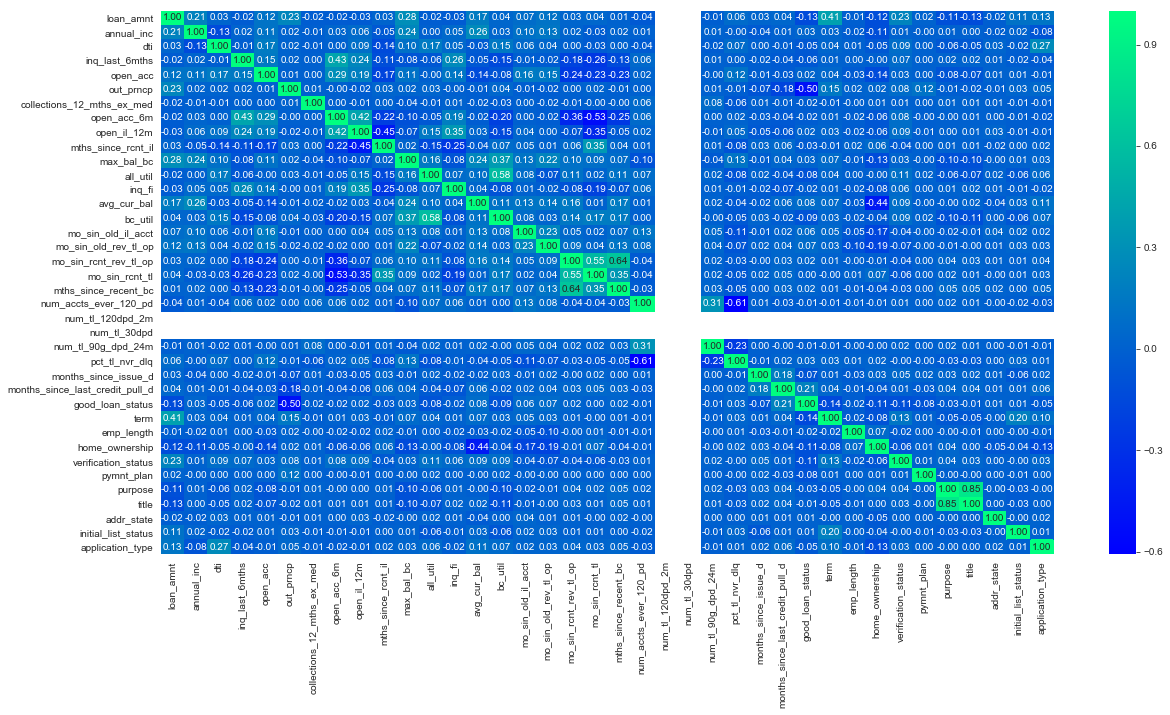

In [77]:
# Is there collinearity?
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), cmap="winter", fmt=".2f", annot=True)

_Remove the values that are correlated +-0.70 or higher

In [79]:
'''df.drop(['percent_bc_gt_75',
         'installment',
         'tot_hi_cred_lim',
         'revol_util'], inplace=True, axis=1)'''

"df.drop(['percent_bc_gt_75',\n         'installment',\n         'tot_hi_cred_lim',\n         'revol_util'], inplace=True, axis=1)"

In [80]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,loan_amnt,annual_inc,dti,inq_last_6mths,open_acc,out_prncp,collections_12_mths_ex_med,open_acc_6m,open_il_12m,mths_since_rcnt_il,...,term,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,addr_state,initial_list_status,application_type
count,73318.000000,7.331800e+04,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,...,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000,73318.000000
mean,15468.067869,8.361535e+04,18.626475,0.544505,11.752080,1461.950196,0.016463,1.094861,0.911877,17.419324,...,0.278540,3.445457,1.857893,0.831556,0.001882,2.758381,3.922475,22.217941,0.838143,0.122098
std,10207.150444,8.560834e+04,16.541851,0.784309,5.924854,5373.006080,0.141941,1.237881,1.070198,22.202875,...,0.448284,3.104096,0.928448,0.738056,0.043344,2.261384,2.501647,14.808760,0.368322,0.327401
min,1000.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,5.000000e+04,10.910000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.000000,9.000000,1.000000,0.000000
50%,12600.000000,7.000000e+04,16.990000,0.000000,11.000000,0.000000,0.000000,1.000000,1.000000,11.000000,...,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,3.000000,21.000000,1.000000,0.000000
75%,21000.000000,1.000000e+05,24.107500,1.000000,15.000000,0.000000,0.000000,2.000000,1.000000,20.000000,...,1.000000,5.000000,3.000000,1.000000,0.000000,3.000000,3.000000,35.000000,1.000000,0.000000
90%,30000.000000,1.400000e+05,31.230000,2.000000,19.000000,0.000000,0.000000,3.000000,2.000000,36.000000,...,1.000000,9.000000,3.000000,2.000000,0.000000,8.000000,9.000000,42.000000,1.000000,1.000000
95%,35000.000000,1.750000e+05,35.950000,2.000000,23.000000,13108.271000,0.000000,3.000000,3.000000,55.000000,...,1.000000,10.000000,3.000000,2.000000,0.000000,8.000000,10.000000,44.000000,1.000000,1.000000
99%,40000.000000,3.000000e+05,55.024900,3.000000,31.000000,29223.653100,1.000000,5.000000,4.000000,126.000000,...,1.000000,10.000000,3.000000,2.000000,0.000000,10.000000,10.000000,47.000000,1.000000,1.000000


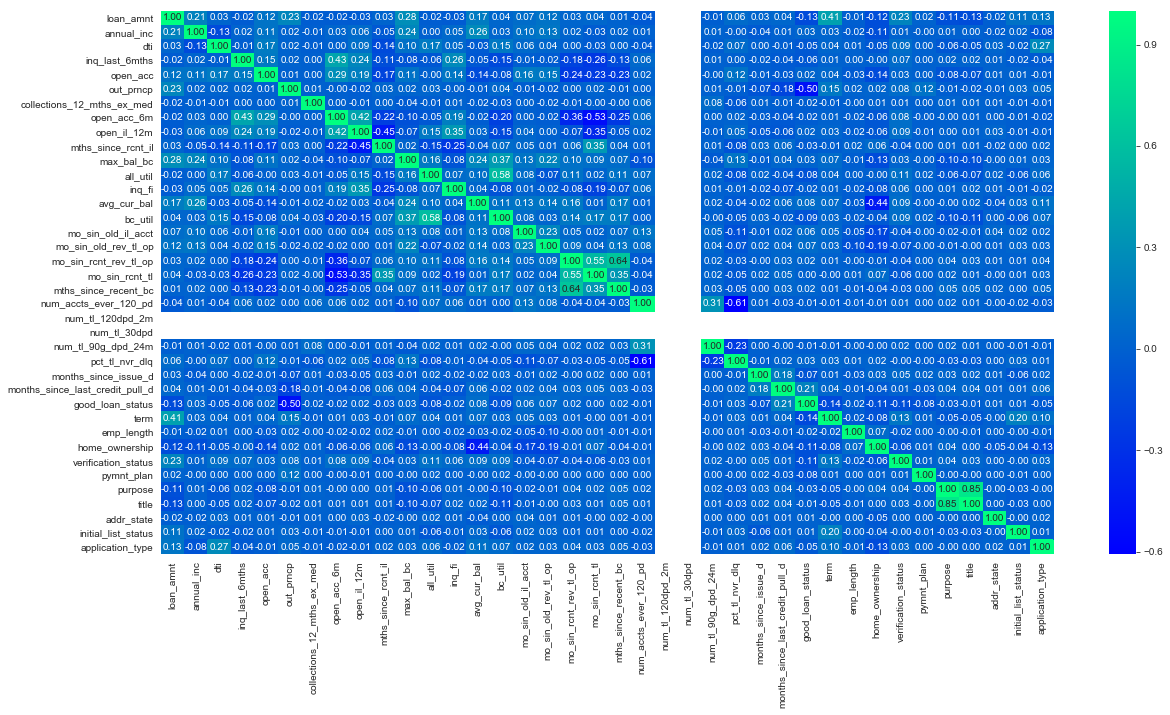

In [81]:
# Is there collinearity?
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), cmap="winter", fmt=".2f", annot=True)

Now there aren't any corralated features.

In [82]:
df.to_csv('lending_club_le.csv')

------